In [1]:
import distl
import numpy as np

# Copy vs Deepcopy



In [2]:
d = distl.gaussian(5, 1)

In [3]:
print(d.uniqueid)

kpPghPWbAEWQYASbuiGr


In [4]:
print(d.copy().uniqueid)

kpPghPWbAEWQYASbuiGr


In [5]:
print(d.deepcopy().uniqueid)

aRnZTybnOaEGvCAHlOVo


# Implications in CompositeDistributions

In [6]:
d = distl.gaussian(5, 1)

In [11]:
print(d.uniqueid)

YYBpLUmOeIZUqPIowCCs


In [12]:
print((5*d).uniqueid)

YYBpLUmOeIZUqPIowCCs


In [7]:
comp = d + 5*d

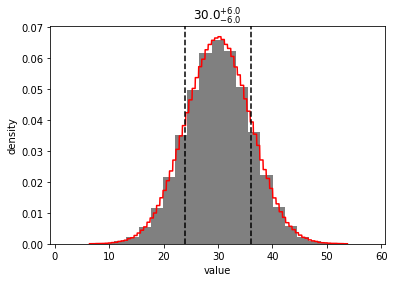

In [8]:
_ = comp.plot(show=True)

In [9]:
comp

<distl.composite <distl.gaussian loc=5.0 scale=1.0> + <distl.gaussian loc=25.0 scale=5.0> unit=None>

In [10]:
comp.to_dict()

{'math': '__add__',
 'dists': [{'loc': 5.0,
   'scale': 1.0,
   'distl': 'Gaussian',
   'distl.version': '0.1.0',
   'uniqueid': 'YYBpLUmOeIZUqPIowCCs'},
  {'loc': 25.0,
   'scale': 5.0,
   'distl': 'Gaussian',
   'distl.version': '0.1.0',
   'uniqueid': 'YYBpLUmOeIZUqPIowCCs'}],
 'distl': 'Composite',
 'distl.version': '0.1.0',
 'uniqueid': 'YYBpLUmOeIZUqPIowCCs,YYBpLUmOeIZUqPIowCCs'}